Dataset Loaded Successfully!
Columns: ['Location', 'Area_Type', 'Bedrooms', 'Bathrooms', 'Square_Feet', 'Region_Type', 'Price']
     Location Area_Type  Bedrooms  Bathrooms  Square_Feet Region_Type  Price
0     Chennai     Urban         3          2         1200       Metro     85
1  Coimbatore  Suburban         2          2          900       Urban     55
2     Madurai     Rural         2          1          800       Rural     35
3   Bangalore     Urban         3          3         1500       Metro    120
4   Hyderabad     Urban         4          3         2000       Metro    150

Missing Values:
 Location       0
Area_Type      0
Bedrooms       0
Bathrooms      0
Square_Feet    0
Region_Type    0
Price          0
dtype: int64
Categorical features encoded!
Model trained!
R² Score: 0.925
MSE: 73.434
RMSE: 8.569


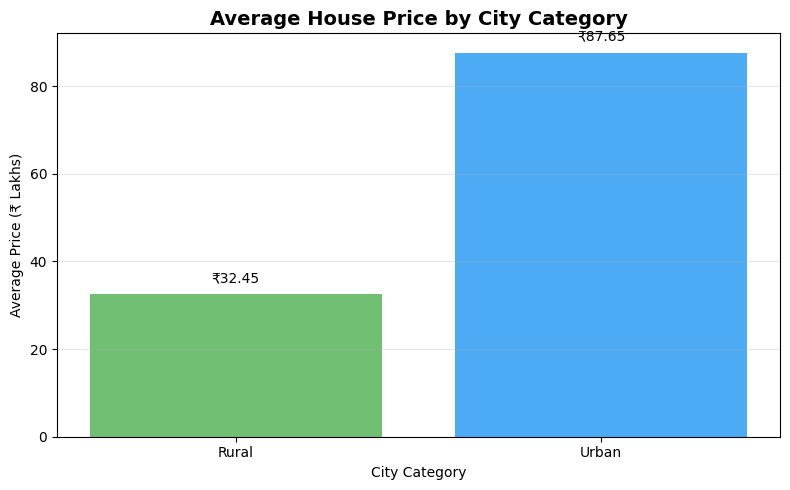

Bar Chart: Urban areas have higher average prices than Rural.


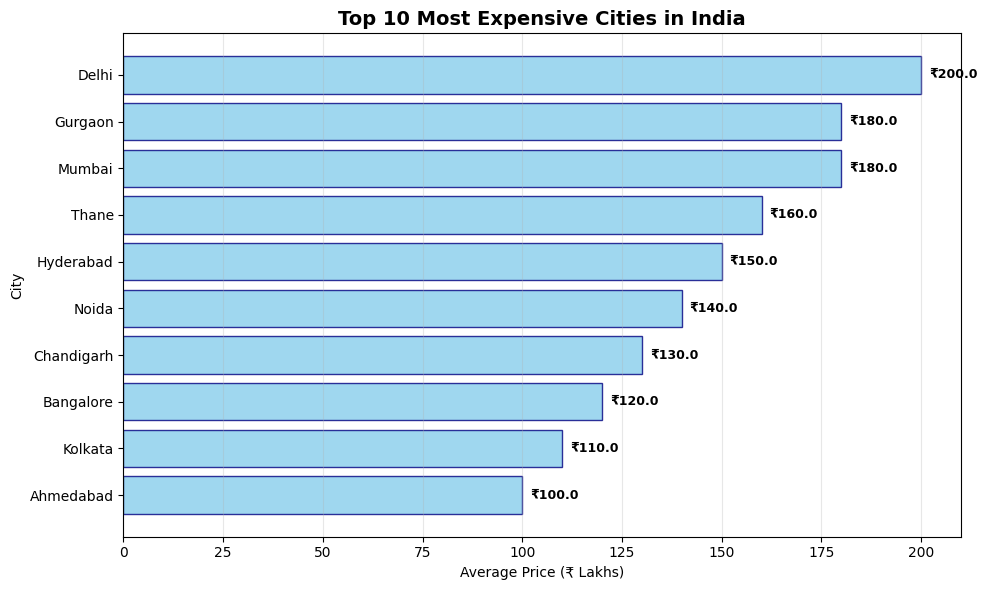

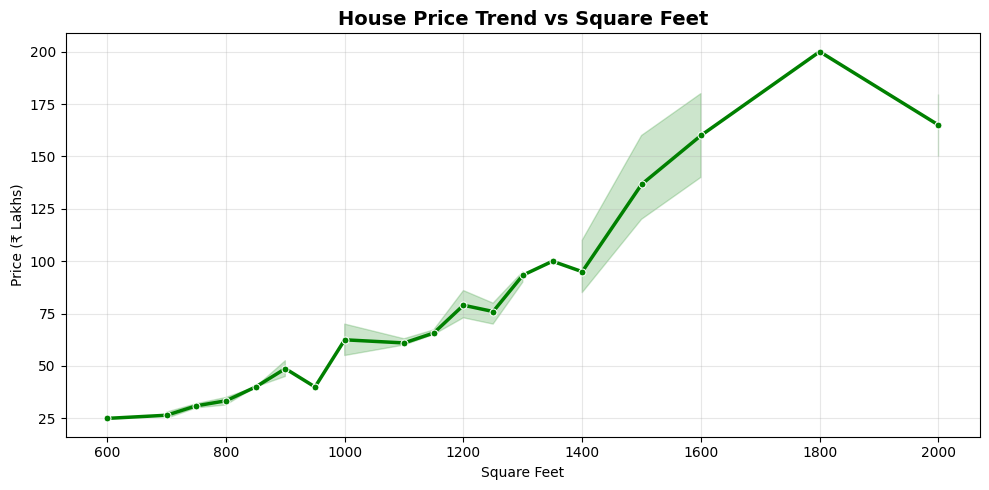

Line Chart: Clear positive trend — larger area → higher price.


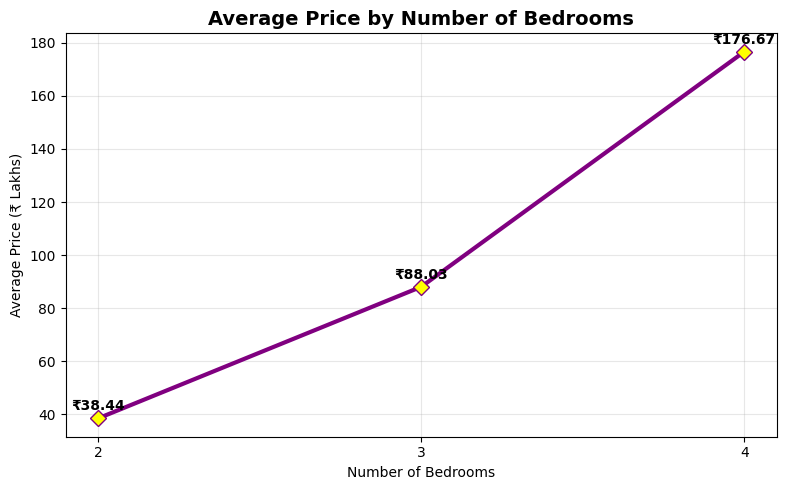

Model and encoders saved to notebooks/models/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import joblib
import os

# Fix the path: Use forward slashes or raw string
# Option 1: Use raw string (Windows)
df = pd.read_csv(r'C:\predict house prices using linear regression\Predict-House-Prices-Using-Linear-Regression\data\House Price India.csv')

# Option 2: Use forward slashes (works everywhere)
# df = pd.read_csv('data/House Price India.csv')

print('Dataset Loaded Successfully!')
print("Columns:", df.columns.tolist())
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill numeric missing values (if any)
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

# Encode categorical columns
label_encoders = {}
categorical_cols = ['Location', 'Area_Type', 'Region_Type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print('Categorical features encoded!')

X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print('Model trained!')

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R² Score: {r2:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')


# --- 1. BAR CHART: Average Price by City Type (Urban vs Rural) ---
# Reverse encoding for readability
df_original = pd.read_csv('C:\predict house prices using linear regression\Predict-House-Prices-Using-Linear-Regression\data\House Price India.csv')  # Reload original for labels

# Map back Region_Type to Urban/Rural
region_map = {'Metro': 'Urban', 'Urban': 'Urban', 'Suburban': 'Suburban', 'Rural': 'Rural'}
df_original['City_Category'] = df_original['Region_Type'].map(region_map)

# Group and calculate mean price
avg_price_by_type = df_original.groupby('City_Category')['Price'].mean().round(2)

plt.figure(figsize=(8, 5))
bars = plt.bar(avg_price_by_type.index, avg_price_by_type.values, 
               color=['#4CAF50', '#2196F3', '#FF9800', '#F44336'], alpha=0.8)
plt.title('Average House Price by City Category', fontsize=14, fontweight='bold')
plt.xlabel('City Category')
plt.ylabel('Average Price (₹ Lakhs)')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'₹{height}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Bar Chart: Urban areas have higher average prices than Rural.")


# --- 2. BAR CHART: Top 10 Most Expensive Cities ---
top_cities = df_original.groupby('Location')['Price'].mean().round(2).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_cities.index[::-1], top_cities.values[::-1], 
                color='skyblue', edgecolor='navy', alpha=0.8)
plt.title('Top 10 Most Expensive Cities in India', fontsize=14, fontweight='bold')
plt.xlabel('Average Price (₹ Lakhs)')
plt.ylabel('City')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (city, price) in enumerate(zip(top_cities.index[::-1], top_cities.values[::-1])):
    plt.text(price + 2, i, f'₹{price}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


# --- 3. LINE CHART: Price vs Square Feet (Trend) ---
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_original, x='Square_Feet', y='Price', 
             marker='o', color='green', linewidth=2.5, markersize=5)
plt.title('House Price Trend vs Square Feet', fontsize=14, fontweight='bold')
plt.xlabel('Square Feet')
plt.ylabel('Price (₹ Lakhs)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Line Chart: Clear positive trend — larger area → higher price.")


# --- 4. LINE CHART: Bedrooms vs Average Price ---
bedroom_price = df_original.groupby('Bedrooms')['Price'].mean().round(2)

plt.figure(figsize=(8, 5))
plt.plot(bedroom_price.index, bedroom_price.values, 
         marker='D', color='purple', linewidth=3, markersize=8, markerfacecolor='yellow')
plt.title('Average Price by Number of Bedrooms', fontsize=14, fontweight='bold')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (₹ Lakhs)')
plt.xticks(bedroom_price.index)
plt.grid(True, alpha=0.3)

# Annotate points
for x, y in zip(bedroom_price.index, bedroom_price.values):
    plt.text(x, y + 3, f'₹{y}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Create models folder
os.makedirs('notebooks/models', exist_ok=True)

# Save model and encoders
joblib.dump(model, 'notebooks/models/linear_model.pkl')
joblib.dump(label_encoders, 'notebooks/models/label_encoders.pkl')

print('Model and encoders saved to notebooks/models/')